In [ ]:
from google.colab import drive
import os

drive.mount ('/content/drive/')

In [ ]:
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense, AveragePooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/OCR/train.csv')
train_data.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data = np.array(train_data)
random.shuffle(train_data)
train_data = pd.DataFrame(train_data)

In [ ]:
X_train = train_data.drop(0, axis=1)
X_train

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train_data[0]
len(y_train.unique())

26

In [ ]:
modified_data = []
for image_array in X_train.iloc:
    image_array: np.ndarray = image_array.to_numpy().reshape(28, 28)
    image_array = image_array.astype(np.uint8)
    image: cv2.Mat = cv2.rotate(image_array, rotateCode=cv2.ROTATE_90_CLOCKWISE)
    image = cv2.flip(image, flipCode=1)
    modified_data.append(image)

modified_array = np.array(modified_data)

In [ ]:
np.save('modified_train', modified_array)

In [ ]:
X_train: np.ndarray = np.load('./modified_train.npy')
X_train.shape

(88799, 28, 28)

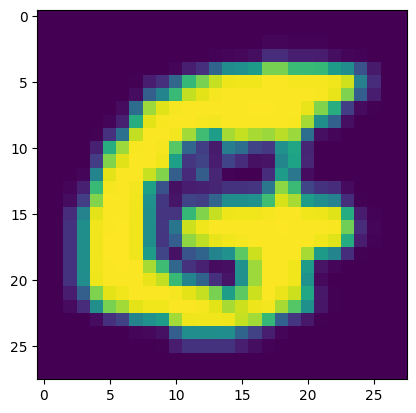

In [ ]:
plt.imshow(X_train[0])

In [ ]:
array = np.array([X_train[0]])
print(array)

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     4   4   2   2   2   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   2   4   5   9
    32  32  21  21  20   9   4   2   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   3  21  34  82 125 129 140
   203 203 174 172 170 140 125  63  18   0   0]
  [  0   0   0   0   0   0   0   1  20  34  84 170 204 233 249 250 250
   254 254 252 252 252 250 237 111  32   0   0]
  [  0   0   0   0   0   0   0   8  77 115 172 232 245 252 254 254 254
   254 254 254 254 253 247 206  76  20   0   0]
  [  0   0   0   0   0   0   7  90 218 243 252 254 254 254 254 254 255
   255 254 254 247 207 159  47   7   1   0   0]
  [  0   0   0   0   0   3  22 159 245 253 254 2

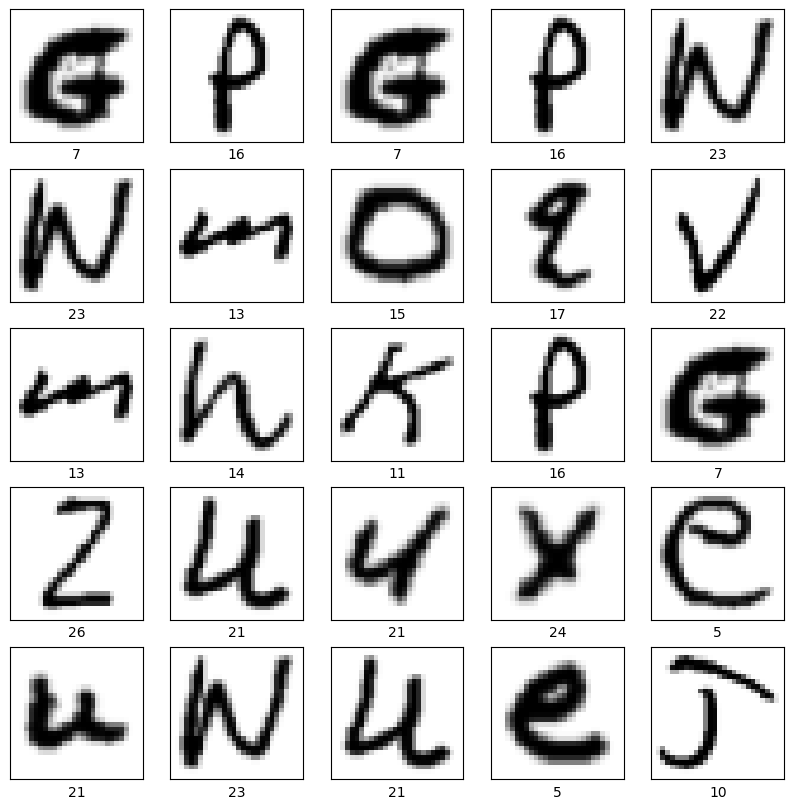

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
modelv1 = models.Sequential()
modelv1.add(layers.Conv2D(6, (5,5), strides=1, activation='tanh', padding='same', input_shape=(28,28,1)))
modelv1.add(layers.AveragePooling2D((2,2), strides=2, padding='valid'))
modelv1.add(layers.Conv2D(16, (5,5), strides=1, activation='tanh', padding='valid'))
modelv1.add(layers.AveragePooling2D((2,2), strides=2, padding='valid'))
modelv1.add(layers.Conv2D(120, (5,5), strides=1, activation='tanh',padding='valid'))

modelv1.add(layers.Flatten())
modelv1.add(layers.Dense(84, activation='tanh'))
modelv1.add(layers.Dense(28, activation='softmax'))

In [ ]:
modelv1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [ ]:
modelv1.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
)

In [ ]:
history = modelv1.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
2220/2220 [==============================] - 25s 6ms/step - loss: 0.5009 - accuracy: 0.8483 - val_loss: 0.3044 - val_accuracy: 0.9015
Epoch 2/10
2220/2220 [==============================] - 20s 9ms/step - loss: 0.2324 - accuracy: 0.9224 - val_loss: 0.2496 - val_accuracy: 0.9169
Epoch 3/10
2220/2220 [==============================] - 12s 6ms/step - loss: 0.1774 - accuracy: 0.9386 - val_loss: 0.2315 - val_accuracy: 0.9256
Epoch 4/10
2220/2220 [==============================] - 12s 5ms/step - loss: 0.1436 - accuracy: 0.9499 - val_loss: 0.2243 - val_accuracy: 0.9275
Epoch 5/10
2220/2220 [==============================] - 13s 6ms/step - loss: 0.1231 - accuracy: 0.9553 - val_loss: 0.2125 - val_accuracy: 0.9343
Epoch 6/10
2220/2220 [==============================] - 12s 6ms/step - loss: 0.1088 - accuracy: 0.9595 - val_loss: 0.2068 - val_accuracy: 0.9358
Epoch 7/10
2220/2220 [==============================] - 11s 5ms/step - loss: 0.0954 - accuracy: 0.9653 - val_loss: 0.2064 - val_ac

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.500859,0.848252,0.304412,0.901464,0
1,0.232365,0.922409,0.249578,0.916892,1
2,0.177405,0.938611,0.231486,0.925619,2
3,0.143624,0.949873,0.224334,0.927534,3
4,0.123144,0.955320,0.212539,0.934291,4
5,0.108771,0.959459,0.206768,0.935811,5
6,0.095448,0.965259,0.206446,0.936430,6
7,0.085868,0.968299,0.214163,0.937669,7
8,0.077488,0.970382,0.206244,0.940203,8
9,0.072317,0.972860,0.206360,0.941610,9


In [ ]:
def plotTraining(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training_acc')
    plt.plot(epochs, val_acc, 'b', label='Validation_acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training_loss')
    plt.plot(epochs, val_loss, 'b', label='Validation_loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

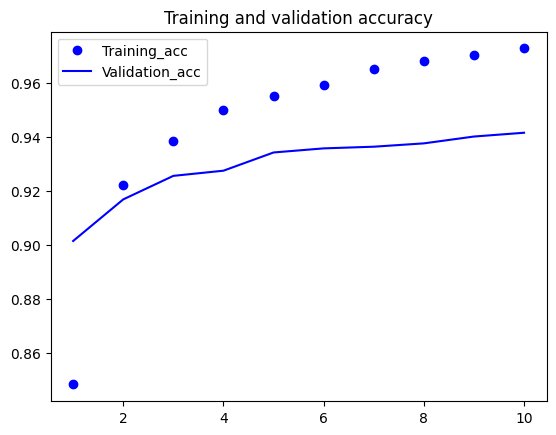

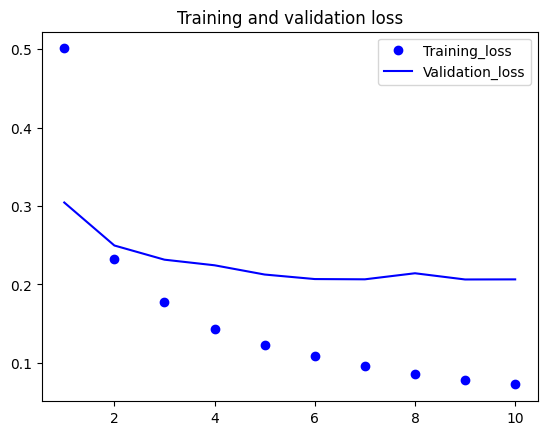

In [ ]:
plotTraining(history)

In [ ]:
modelv1.save('/content/drive/My Drive/OCR/training')

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/OCR/test.csv')
len(test_data)

14799

In [ ]:
X_test = test_data.drop('1', axis=1)
y_test = test_data['1']

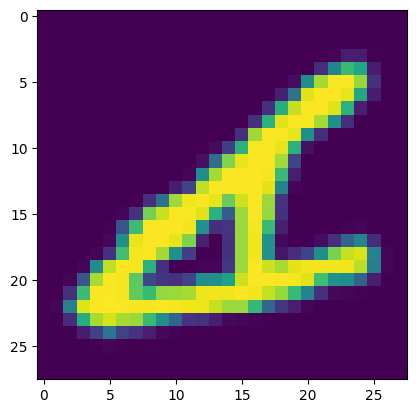

In [ ]:
image = X_test.iloc[0].to_numpy().reshape(28, 28)
plt.imshow(image)

In [ ]:
modified_data = []
for cnt, image_array in enumerate(X_test.iloc):
    image_array: np.ndarray = image_array.to_numpy().reshape(28, 28)
    image_array = image_array.astype(np.uint8)
    image: cv2.Mat = cv2.rotate(image_array, rotateCode=cv2.ROTATE_90_CLOCKWISE)
    image = cv2.flip(image, flipCode=1)
    modified_data.append(image)

modified_array = np.array(modified_data)

In [ ]:
np.save('modified_test', modified_array)

In [ ]:
X_test: np.ndarray = np.load('./modified_test.npy')
X_test[0].shape

(28, 28)

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/OCR/training')

In [ ]:
new_model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
        metrics=['accuracy']
)

In [ ]:
evaluation = new_model.evaluate(X_test, y_test)

463/463 [==============================] - 2s 3ms/step - loss: 0.3520 - accuracy: 0.9052


In [ ]:
def plotTesting(history):
    acc = history.history['accuracy']
    loss = history.history['loss']

    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'b', label='Testing_acc')
    plt.plot(epochs, loss, 'b', label='Testing_loss')
    plt.title('Testing Accuracy and Testing Loss')
    plt.legend()

    plt.figure()

    plt.show()

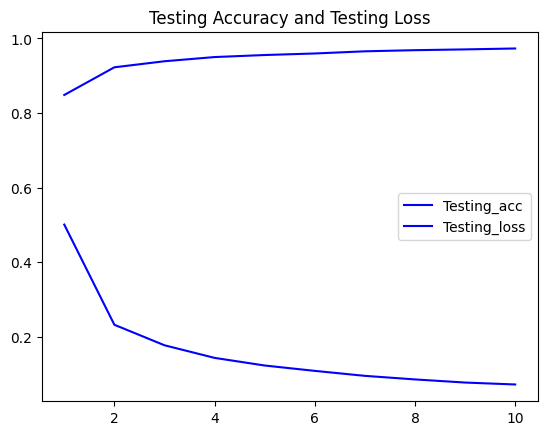

<Figure size 640x480 with 0 Axes>

In [ ]:
plotTesting(history)

In [ ]:
with open('/content/drive/My Drive/OCR/mapping.txt', encoding='utf8') as f:
    for line in f:
        print(line.strip())

1 65 97
2 66 98
3 67 99
4 68 100
5 69 101
6 70 102
7 71 103
8 72 104
9 73 105
10 74 106
11 75 107
12 76 108
13 77 109
14 78 110
15 79 111
16 80 112
17 81 113
18 82 114
19 83 115
20 84 116
21 85 117
22 86 118
23 87 119
24 88 120
25 89 121
26 90 122


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()

def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [ ]:
print("label precision recall")
for label in range(26):
    print(f"{label:5d} {precision(label):9.3f} {recall(label):6.3f}")

label precision recall


TypeError: ignored